<a href="https://colab.research.google.com/github/Abhiraj36/Malaria-Diagnosis-Using-CNNs/blob/main/Malaria_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.layers import InputLayer

from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense

In [3]:
dataset, dataset_info = tfds.load('malaria', with_info = True, as_supervised = True, shuffle_files = True, split = ['train'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/incomplete.FA2GTC_1.0.0/malaria-train.tfrecord*...:   0%|         …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


Data Splitting

In [4]:
def splits(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO):

  dataset_size=len(dataset)
  train_dataset = dataset.take(int(0.6*dataset_size))


  val_dataset = dataset.skip(int(TRAIN_RATIO*dataset_size))
  val_dataset = val_dataset.take(int(VAL_RATIO*dataset_size))


  test_dataset = dataset.skip(int((VAL_RATIO*dataset_size)+(TRAIN_RATIO*dataset_size)))
  #print(list(test_dataset.as_numpy_iterator()))
  return train_dataset, val_dataset, test_dataset

In [5]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1

#dataset = tf.data.Dataset.range(10)
train_dataset, val_dataset, test_dataset = splits(dataset[0], TRAIN_RATIO, VAL_RATIO, TEST_RATIO)
#print(list(train_dataset.take(1).as_numpy_iterator()),  list(test_dataset.take(1).as_numpy_iterator()))


DATA VISUALISATION

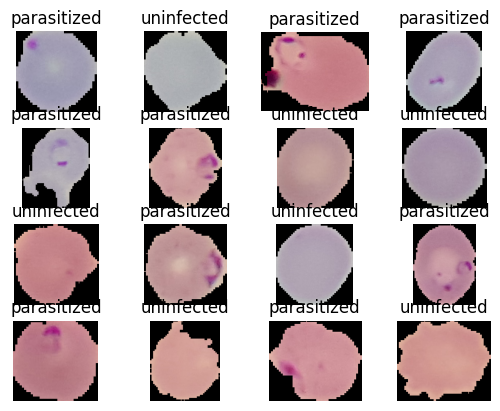

In [6]:
for i,(image, label) in enumerate(train_dataset.take(16)):
  ax=plt.subplot(4, 4, i+1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
  plt.axis('off')

In [7]:
dataset_info.features['label'].int2str(0)

'parasitized'

DATA PREPROCESSING

In [8]:
#Image resizing and then normalisation
IM_SIZE = 224
def resizing_rescale(image,label):
  return tf.image.resize(image,(IM_SIZE, IM_SIZE))/255.0,label
train_dataset = train_dataset.map(resizing_rescale)

In [9]:
for image, label in train_dataset.take(1):
  print(image, label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


In [10]:
train_dataset = train_dataset.shuffle(buffer_size = 1000, reshuffle_each_iteration =True).batch(32).prefetch(tf.data.AUTOTUNE)

Model Creation

In [11]:
model = tf.keras.Sequential([
                     InputLayer(shape=(IM_SIZE, IM_SIZE, 3)),
                     Conv2D(filters = 6, kernel_size = 5, strides = 1, padding = 'valid', activation = 'sigmoid'),
                     MaxPool2D(pool_size = 2, strides =2),
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 220, 220, 6)         │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 6)         │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 456 (1.78 KB)

 Trainable params: 456 (1.78 KB)

 Non-trainable params: 0 (0.00 B)